<a href="https://colab.research.google.com/github/trambakm53/API-Speech-Tagging-Projects/blob/main/nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import importlib
import string
import seaborn as sns
from textblob import TextBlob
from nltk.tokenize import word_tokenize
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import ngrams
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
!pip install textblob

In [5]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df['review'].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

### Steps to cover:

#####1.Data Gathering
#####2.Cleaning(Lowercasing, removing leading & trailing spaces,removing html tags,removing urls,expanding abbr,spelling correction, punctuation, removing spl charctrs )
#####3.Pre-process(Tokenization,stopword removal,stemming)
#####4.EDA
#####5.Make Features
#####6.Vectorization(Transfer the text to no.Ex Bow, word2vec)
#####7.Modelling(Apply ML Model & deep learning technique)
#####8.Deploy(The Ml Model)
#####9.Monitor the model.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
df.duplicated().sum()

418

In [10]:
df = df.drop_duplicates()

In [11]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
## Step1. Convert to lowercase
df['review'] = df['review'].str.lower()

In [13]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [14]:
## Step2. Remove whitespaces
df['review' ] = df['review'].str.strip()

In [15]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [16]:
## Removing special characters

import re

def remove_html(data):
  data = re.sub(r'<.*?>','',data)
  return data

In [17]:
remove_html('<p>my name is nitish</p><br><img>')

'my name is nitish'

In [18]:
## Another method to remove special characters
df['review'] = df['review'].str.replace('<.*?>','')

<ipython-input-18-5477b0cf2f26>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('<.*?>','')


In [19]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [20]:
## Remove url ex http.//www.campusx.in
import re

def remove_url(data):
  data = re.sub(r'https?://\S+|www\.\S+','',data)
  return data

In [21]:
remove_url('to register log on to https://campusx.co.in')

'to register log on to '

In [22]:
## Removing the special characters
df['review'] = df['review'].str.replace('https?://\S+|www\.\S+','')

<ipython-input-22-2ecc7a66c987>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('https?://\S+|www\.\S+','')


In [23]:
## This code indicates if the str contains the URL or not
df[df['review'].str.contains(r'https?://\S+|www\.\S+')]

,review,sentiment


In [24]:
def remove_abbr(data):
  data = re.sub(r"what's","what's",data)
  return data

In [25]:
punctuation='["\'?,\.]' # I will replace all these punctuation with ''
abbr_dict={
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",
    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",
    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",
    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",
     "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    punctuation:'',
    '\s+':' ', # replace multi space with one single space
}

In [26]:
df.replace(abbr_dict,regex=True,inplace=True)

In [27]:
df.iloc[0][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows would not dare forget pretty p

In [28]:
from textblob import TextBlob

text = "I can driv at nght"
TextBlob(text).correct().string

'I can drive at night'

In [29]:
def spelling_correction(text):
  return TextBlob(text).correct().string

In [30]:
df_1k=df.iloc[:100]

In [31]:
df_1k['review'].apply(spelling_correction)

0     one of the other reviews has mentioned that af...
1     a wonderful little production the filling tech...
2     i thought this was a wonderful way to spend ti...
3     basically there is a family where a little boy...
4     letter matters love in the time of money is a ...
                            ...                        
95    daniel day-lewis is the most versatile actor a...
96    my guess would be this was originally going to...
97    well i like to watch bad horror b-moves cause ...
98    this is the worst movie i have ever seen as we...
99    i have been a marie fan for as long as i can r...
Name: review, Length: 100, dtype: object

In [32]:
#string.punctuation

In [33]:
def remove_punctuation(text):
  for i in string.punctuation:
    if i in text:
     text =  text.replace(i,'')
  return text

In [34]:
df_1k['review'] = df_1k['review'].apply(remove_punctuation)
df_1k.head()

<ipython-input-34-2506c05af1a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1k['review'] = df_1k['review'].apply(remove_punctuation)


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


In [35]:
## Remove Special Characters
from textblob import TextBlob

def correct_spelling(text):
  return TextBlob(text).correct().string

In [36]:
df_1k['review'] = df_1k['review'].apply(correct_spelling)

<ipython-input-36-f3c18b6b5cab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1k['review'] = df_1k['review'].apply(correct_spelling)


##### Starting the Pre-processing

In [37]:
from nltk.tokenize import word_tokenize

In [38]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
df_1k['tokenized_review'] = df_1k['review'].apply(word_tokenize)

<ipython-input-39-3935e7ad7b69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1k['tokenized_review'] = df_1k['review'].apply(word_tokenize)


In [40]:
#### Stopwords Removal
from nltk.corpus import stopwords

def remove_stopwords(text):
  L = []
  for words in text:
    if words not in stopwords.words('english'):
      L.append(words)
  return L

In [41]:
df_1k['tokenized_review'] = df_1k['tokenized_review'].apply(remove_stopwords)

<ipython-input-41-8d8eb856d05f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1k['tokenized_review'] = df_1k['tokenized_review'].apply(remove_stopwords)


In [42]:
df_1k.head()

,review,sentiment,tokenized_review
0,one of the other reviews has mentioned that af...,positive,"[one, reviews, mentioned, watching, 1, oz, epi..."
1,a wonderful little production the filling tech...,positive,"[wonderful, little, production, filling, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,letter matters love in the time of money is a ...,positive,"[letter, matters, love, time, money, usually, ..."


In [43]:
df_1k['tokenized_review'] = df_1k['tokenized_review'].apply(lambda x:" ".join(x))

<ipython-input-43-6d270936998d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1k['tokenized_review'] = df_1k['tokenized_review'].apply(lambda x:" ".join(x))


In [44]:
df_1k['char_len'] = df_1k['review'].str.len()

<ipython-input-44-044ad559e35f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1k['char_len'] = df_1k['review'].str.len()


In [45]:
df_1k['word_length'] = df_1k['tokenized_review'].apply(len)

<ipython-input-45-2138bfea26cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1k['word_length'] = df_1k['tokenized_review'].apply(len)


In [46]:
df_1k.head()

,review,sentiment,tokenized_review,char_len,word_length
0,one of the other reviews has mentioned that af...,positive,one reviews mentioned watching 1 oz episode ho...,1662,1125
1,a wonderful little production the filling tech...,positive,wonderful little production filling technique ...,930,650
2,i thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,871,579
3,basically there is a family where a little boy...,negative,basically family little boy jake thinks combin...,695,441
4,letter matters love in the time of money is a ...,positive,letter matters love time money usually stunnin...,1227,853


<ipython-input-47-e2dc72d1f7ec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1k['char_len'])


<Axes: xlabel='char_len', ylabel='Density'>

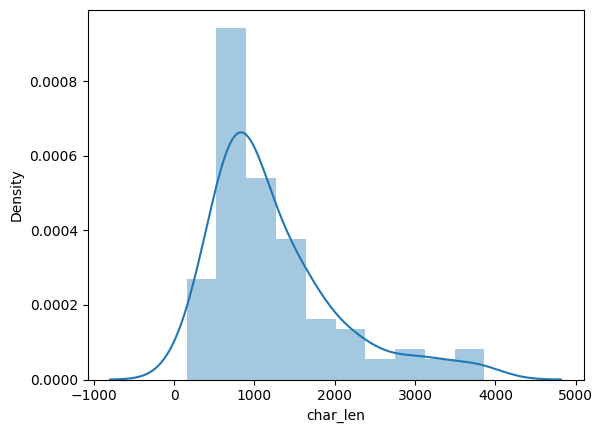

In [47]:
sns.distplot(df_1k['char_len'])

<ipython-input-48-21a34fca8f3e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1k[df_1k['sentiment'] == 'positive']['char_len']) ## Positive reviews
<ipython-input-48-21a34fca8f3e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1k[df_1k['sentiment'] != 'positive']['char_len']) ## Negat

<Axes: xlabel='char_len', ylabel='Density'>

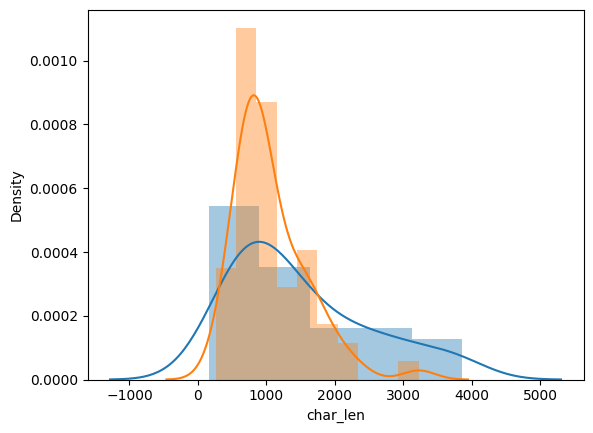

In [48]:
sns.distplot(df_1k[df_1k['sentiment'] == 'positive']['char_len']) ## Positive reviews
sns.distplot(df_1k[df_1k['sentiment'] != 'positive']['char_len']) ## Negative reviews

<ipython-input-49-da3d7344b09e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1k[df_1k['sentiment'] == 'positive']['word_length'])
<ipython-input-49-da3d7344b09e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1k[df_1k['sentiment'] != 'positive']['word_length'])


<Axes: xlabel='word_length', ylabel='Density'>

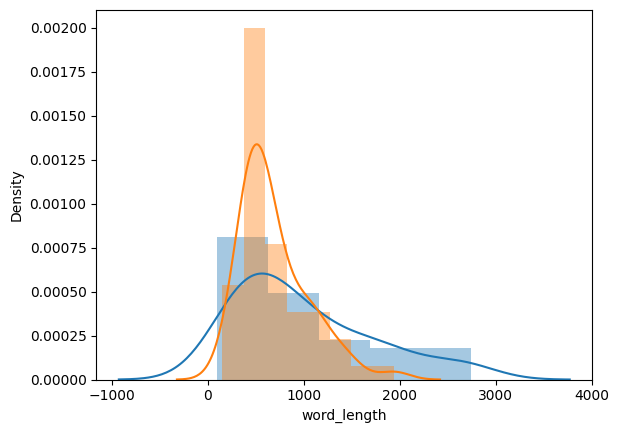

In [49]:
sns.distplot(df_1k[df_1k['sentiment'] == 'positive']['word_length'])
sns.distplot(df_1k[df_1k['sentiment'] != 'positive']['word_length'])

In [50]:
from nltk import ngrams

In [56]:
#pd.Series(ngrams(df_1k['tokenized_review'].sum(), 3)).value_counts

In [68]:
#pd.Series(ngrams(df_1k['tokenized_review'].sum(), 2)).value_counts

sentence = '_start_ this is ngram _generation_'
def ngrams_sentence(text):
  s = pd.Series()
  for sentence in text:
    my_ngrams = ngrams(text.split(), 2)
    return pd.Series(my_ngrams)


#ngrams_sentence('_start_ this is ngram _generation_')
#ngrams_sentence(df_1k['review'])
for x in df_1k['review']:
  s = []
  print(ngrams_sentence(x))
  s.append(ngrams_sentence(x))


0             (one, of)
1             (of, the)
2          (the, other)
3      (other, reviews)
4        (reviews, has)
             ...       
299         (in, touch)
300       (touch, with)
301        (with, your)
302      (your, darker)
303      (darker, side)
Length: 304, dtype: object
0            (a, wonderful)
1       (wonderful, little)
2      (little, production)
3         (production, the)
4            (the, filling)
               ...         
150        (every, surface)
151          (surface, are)
152         (are, terribly)
153        (terribly, well)
154            (well, done)
Length: 155, dtype: object
0         (i, thought)
1      (thought, this)
2          (this, was)
3             (was, a)
4       (a, wonderful)
            ...       
157       (comedy, to)
158           (to, go)
159          (go, see)
160        (see, with)
161    (with, friends)
Length: 162, dtype: object
0      (basically, there)
1             (there, is)
2                 (is, a)
3             (a

In [80]:
d = {}

print(type(d))
for x in s:
  if tuple(x) not in d:
    d[tuple(x)] = []
  else:
    d[tuple(x)] +=1

<class 'dict'>


In [83]:
for x in s:
  for y in x:
    print(y)
    print(type(y))

('i', 'have')
<class 'tuple'>
('have', 'been')
<class 'tuple'>
('been', 'a')
<class 'tuple'>
('a', 'marie')
<class 'tuple'>
('marie', 'fan')
<class 'tuple'>
('fan', 'for')
<class 'tuple'>
('for', 'as')
<class 'tuple'>
('as', 'long')
<class 'tuple'>
('long', 'as')
<class 'tuple'>
('as', 'i')
<class 'tuple'>
('i', 'can')
<class 'tuple'>
('can', 'remember')
<class 'tuple'>
('remember', 'i')
<class 'tuple'>
('i', 'have')
<class 'tuple'>
('have', 'very')
<class 'tuple'>
('very', 'fond')
<class 'tuple'>
('fond', 'memories')
<class 'tuple'>
('memories', 'of')
<class 'tuple'>
('of', 'playing')
<class 'tuple'>
('playing', 'super')
<class 'tuple'>
('super', 'marie')
<class 'tuple'>
('marie', 'world')
<class 'tuple'>
('world', 'as')
<class 'tuple'>
('as', 'a')
<class 'tuple'>
('a', 'kid')
<class 'tuple'>
('kid', 'this')
<class 'tuple'>
('this', 'game')
<class 'tuple'>
('game', 'has')
<class 'tuple'>
('has', 'brought')
<class 'tuple'>
('brought', 'back')
<class 'tuple'>
('back', 'many')
<class 'tu

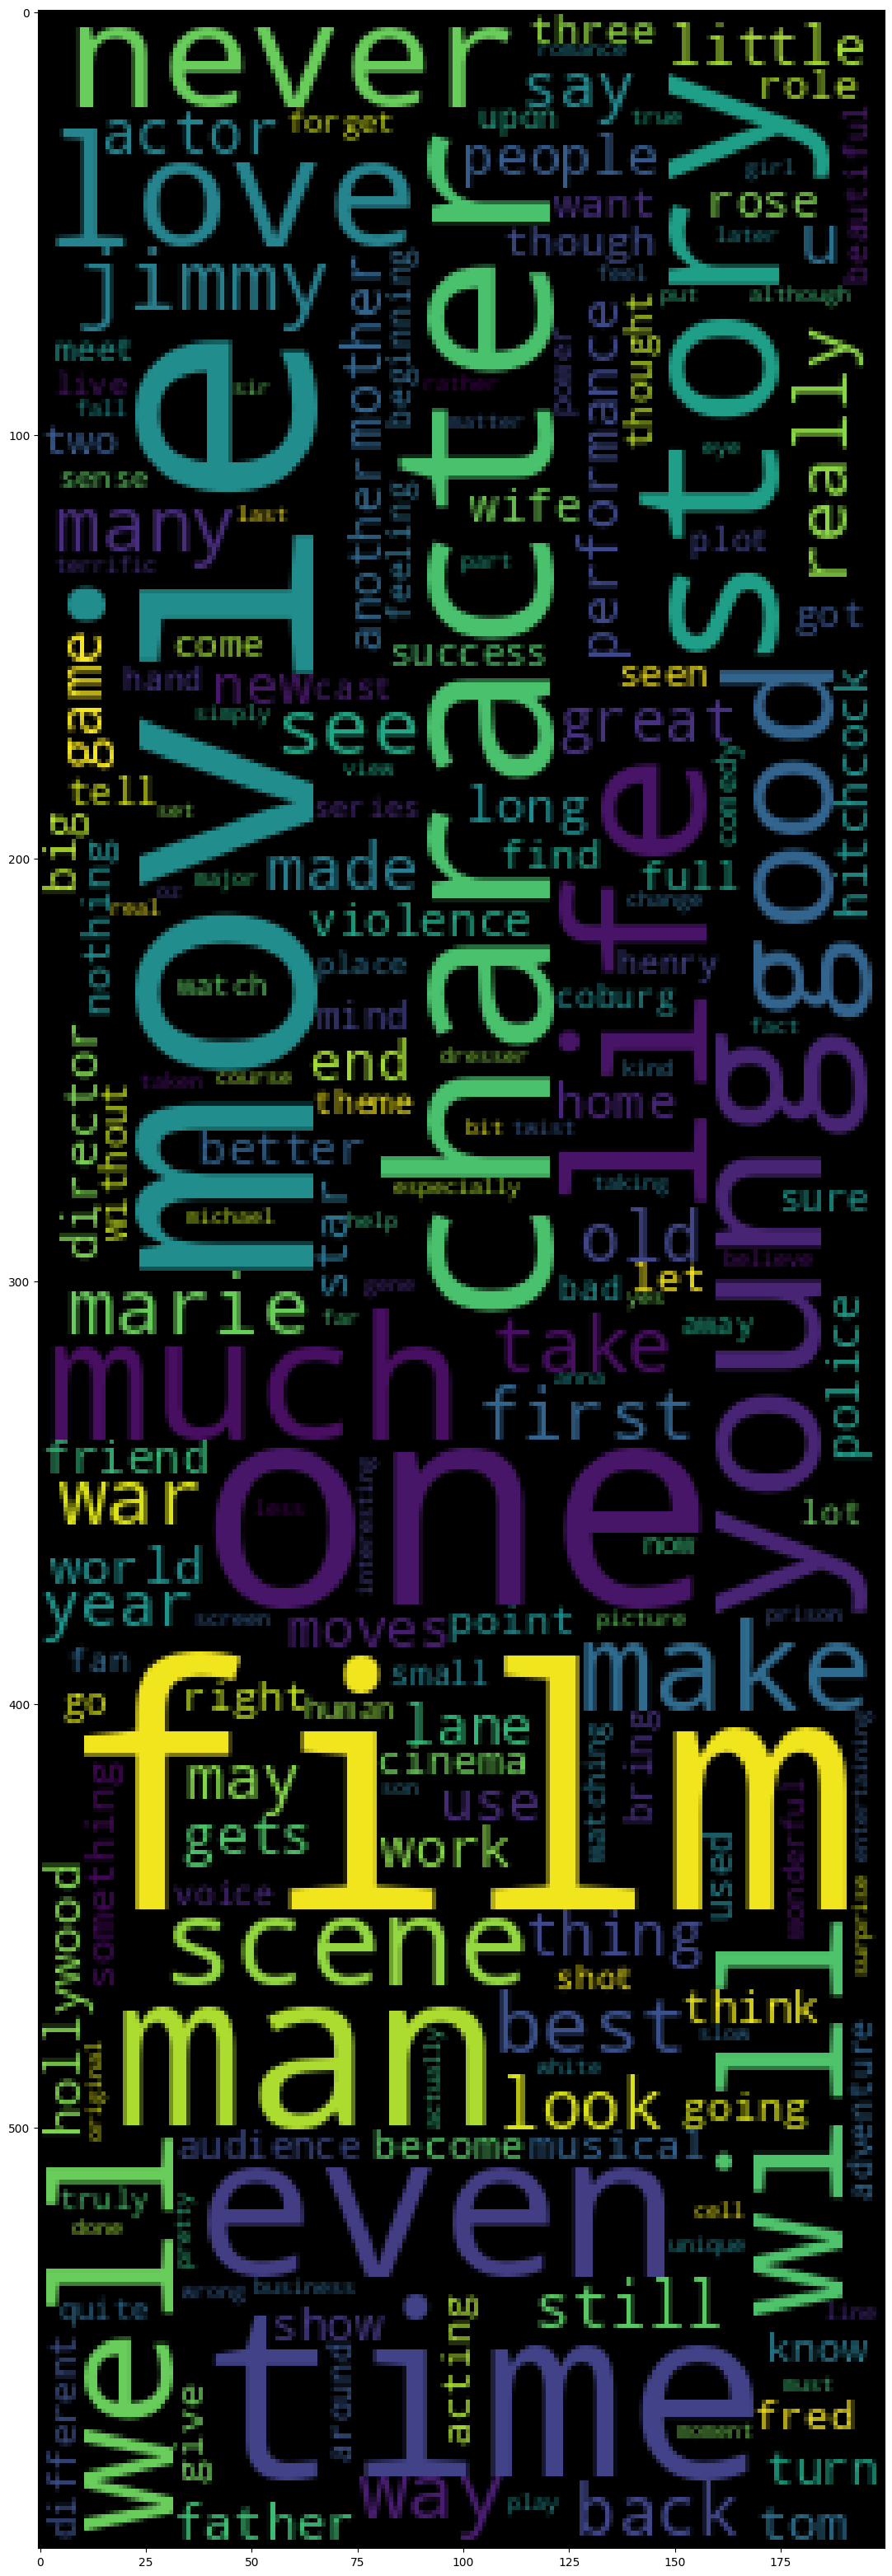

In [93]:
plt.figure(figsize= (40,40))
wc = WordCloud(width = 200 , height = 600 ).generate(" ".join(df_1k[df_1k['sentiment'] == 'positive']['review']))
plt.imshow(wc)

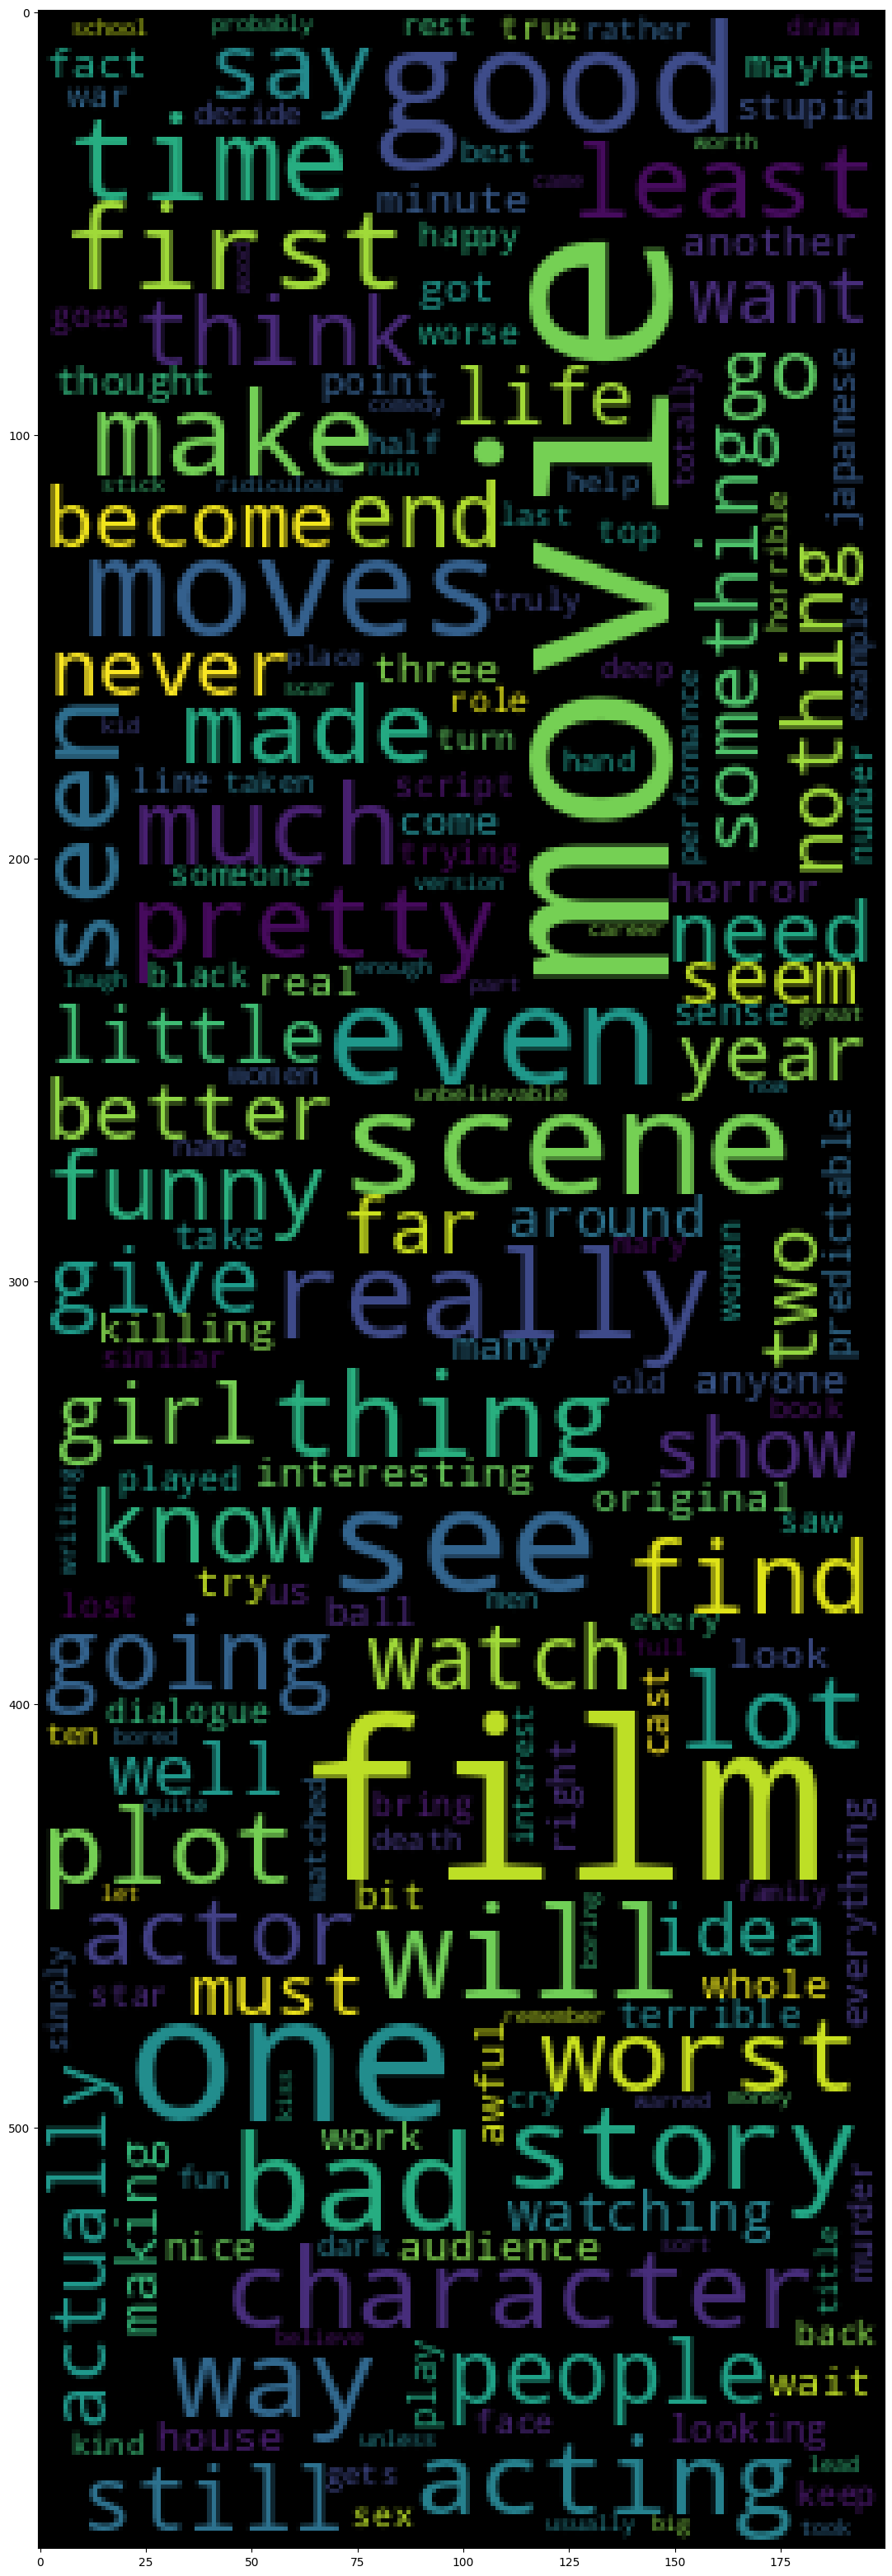

In [94]:
plt.figure(figsize =(40,40))
wc = WordCloud(width = 200, height = 600).generate(" ".join(df_1k[df_1k['sentiment'] == 'negative']['review']))
plt.imshow(wc)

In [102]:
count_vectorizer= CountVectorizer(max_features = 500 )
bag_of_words = count_vectorizer.fit_transform(df_1k['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray() , columns = count_vectorizer.get_feature_names_out())

In [103]:
bag_of_words

,10,about,absolutely,acting,action,actor,actors,actress,actual,actually,...,would,writing,wrong,year,years,yes,yet,you,young,your
0,0,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,3,0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,0,2,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
96,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,0
97,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
98,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,8,0,1


In [85]:
df_1k.head()

,review,sentiment,tokenized_review,char_len,word_length
0,one of the other reviews has mentioned that af...,positive,one reviews mentioned watching 1 oz episode ho...,1662,1125
1,a wonderful little production the filling tech...,positive,wonderful little production filling technique ...,930,650
2,i thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,871,579
3,basically there is a family where a little boy...,negative,basically family little boy jake thinks combin...,695,441
4,letter matters love in the time of money is a ...,positive,letter matters love time money usually stunnin...,1227,853


In [52]:
#df_1k.head()

for x in df_1k['review']:
  print(x.split())

['one', 'of', 'the', 'other', 'reviews', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'you', 'will', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'metre', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutally', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punched', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardware', 'in', 'the', 'classic', 'use', 'of', 'the', 'words', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'onward', 'maximum', 'security', 'state', 'penitentiary', 'it', 'focused', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', 'the', 'cells', 'have'

In [53]:
type(pd.Series(ngrams(df_1k['tokenized_review'].sum(), 2)).value_counts())

pandas.core.series.Series

In [105]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(bag_of_words.values)

In [113]:
print(pca_result.shape)
print(pca_result[:,0].shape)
print(pca_result[:,1].shape)

(100, 2)
(100,)
(100,)


In [126]:
pca_result
#type(pca_result)
pca_result = pd.DataFrame(pca_result, columns=['col_1', 'col_2'])
pca_result

,col_1,col_2
0,3.162518,-1.133407
1,-1.684876,-3.674704
2,-7.150760,0.894350
3,-9.951043,0.321652
4,2.891407,-4.016592
...,...,...
95,2.167206,3.284665
96,-6.981848,0.321801
97,-11.034861,0.101500
98,-6.650557,0.548424


<Axes: xlabel='col_1', ylabel='col_2'>

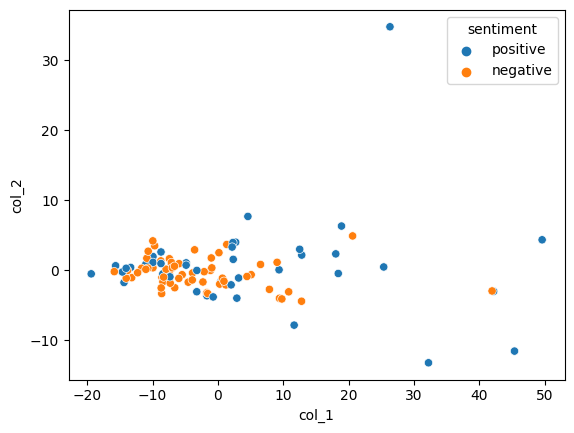

In [128]:
sns.scatterplot(x = "col_1",  y = "col_2", data = pca_result , hue = df_1k['sentiment'])

#sns.scatterplot(x="col_name_1", y="col_name_2", data=df)